# Part I - Ford GoBike System Dataset Exploration 
## by Lien Nguyen Doan Kieu Lien

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [2]:
!pip install -U seaborn --q
!pip install -U tensorflow-tensorboard --q
!pip install -U dask --q

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
dataset = pd.read_csv("201902-fordgobike-tripdata.csv")

dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
dataset.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D00A7D7988>,
      dtype=object)

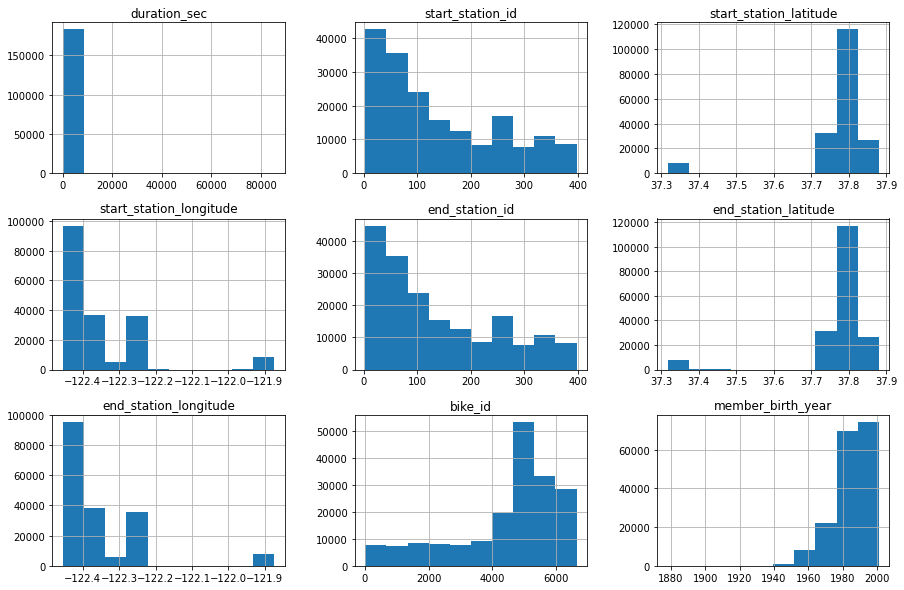

In [6]:
dataset.hist(figsize=(15, 10))

### Modify/Format datatype in dataset

In [7]:
def modify_datatype(dataset):
    """
        Modify mismatched dataset
    """
    
    # format start_time and end_time to datetime data type
    dataset['start_time'] = pd.to_datetime(dataset['start_time'])
    dataset['end_time'] = pd.to_datetime(dataset['end_time'])

    # format bike_share_for_all_trip to boolean
    dataset['bike_share_for_all_trip'] = dataset['bike_share_for_all_trip'].replace({"Yes": True, "No": False}).astype(bool)
    return dataset

In [8]:
dataset = modify_datatype(dataset)
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True


### What is the structure of your dataset?

> There are 16 columns ('duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip') and 183411 rows in this dataset
    
### What is/are the main feature(s) of interest in your dataset?
    
> How location distribution, user type and member gender affects the bike share result? 
    
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_station_name, start_station_latitude, start_station_longitude, end_station_name, end_station_latitude, end_station_longitude, user_type and member_gender would do the trick.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [9]:
len(np.unique(dataset['bike_id']))

4646



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### What are the most popular stations to start the trip? (list top 10)

In [10]:
popular_start_station = dataset.groupby(['start_station_name'])['start_station_name'] \
                               .count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False)
popular_start_station.head(10)

,start_station_name,count
199,Market St at 10th St,3904
260,San Francisco Caltrain Station 2 (Townsend St...,3544
82,Berry St at 4th St,3052
220,Montgomery St BART Station (Market St at 2nd St),2895
241,Powell St BART Station (Market St at 4th St),2760
262,San Francisco Ferry Building (Harry Bridges Pl...,2710
259,San Francisco Caltrain (Townsend St at 4th St),2703
242,Powell St BART Station (Market St at 5th St),2327
170,Howard St at Beale St,2293
285,Steuart St at Market St,2283


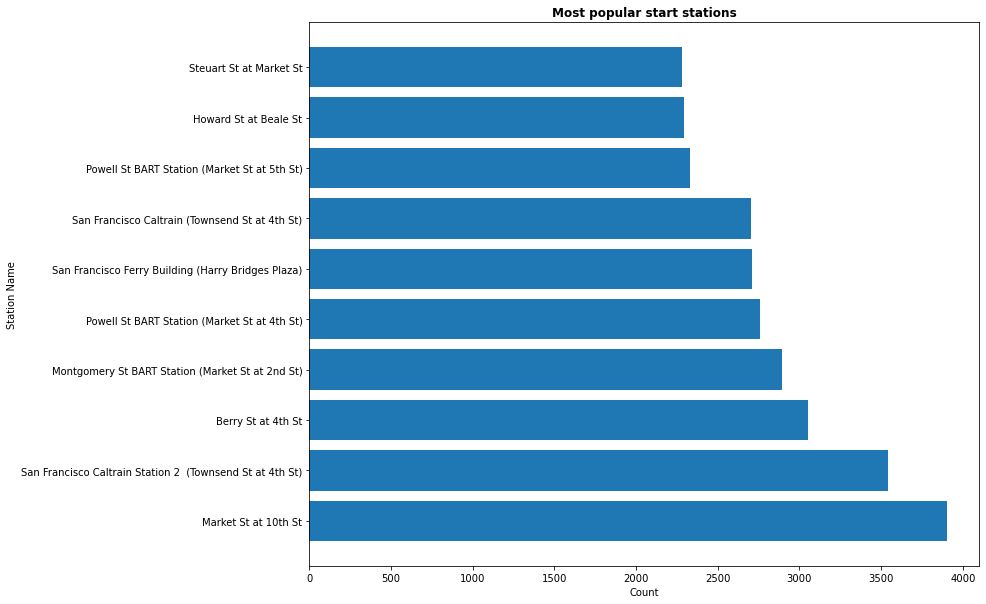

In [11]:
# Plot based on the value counts
plt.subplots(figsize=(12,10));
plt.title('Most popular start stations', fontweight='bold')
plt.barh(popular_start_station["start_station_name"][:10], popular_start_station["count"][:10])
plt.xlabel('Count');
plt.ylabel('Station Name');
plt.show();

> We can see that many people choose "Market St at 10th St" as a place to start

### What are the most popular routes

In [12]:
popular_routes = dataset.groupby(['start_station_name', 'end_station_name'])['bike_id'] \
                        .count() \
                        .reset_index(name='count') \
                        .sort_values(['count'], ascending=False)
popular_routes['routes'] = popular_routes['start_station_name'] + " - " + popular_routes['end_station_name']

popular_routes.head(10)

,start_station_name,end_station_name,count,routes
5938,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,337,Berry St at 4th St - San Francisco Ferry Build...
19112,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,314,San Francisco Ferry Building (Harry Bridges Pl...
11187,Grand Ave at Perkins St,19th Street BART Station,310,Grand Ave at Perkins St - 19th Street BART Sta...
21066,The Embarcadero at Sansome St,Steuart St at Market St,285,The Embarcadero at Sansome St - Steuart St at ...
1776,19th Street BART Station,Grand Ave at Perkins St,284,19th Street BART Station - Grand Ave at Perkin...
21502,Townsend St at 7th St,San Francisco Caltrain Station 2 (Townsend St...,272,Townsend St at 7th St - San Francisco Caltrain...
14383,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),272,Market St at 10th St - Montgomery St BART Stat...
18550,San Fernando St at 7th St,5th St at Virginia St,249,San Fernando St at 7th St - 5th St at Virginia St
14391,Market St at 10th St,Powell St BART Station (Market St at 4th St),247,Market St at 10th St - Powell St BART Station ...
4582,5th St at Virginia St,San Fernando St at 7th St,242,5th St at Virginia St - San Fernando St at 7th St


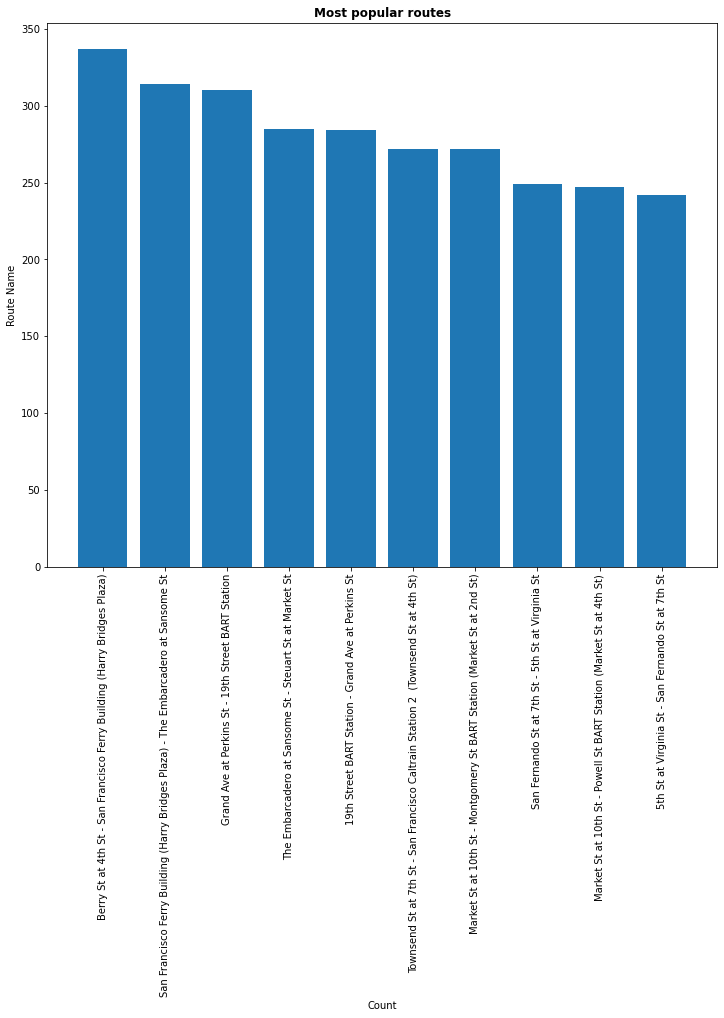

In [13]:
# Plot based on the value counts
plt.subplots(figsize=(12,10));
plt.title('Most popular routes', fontweight='bold')
plt.bar(popular_routes["routes"][:10], popular_routes["count"][:10])
plt.xlabel('Count');
plt.xticks(rotation=90)
plt.ylabel('Route Name');
plt.show();

> "Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza)" is the most popular routes around here.

### What are the top10 start station by duration second?

Text(0, 0.5, 'Duration Second')

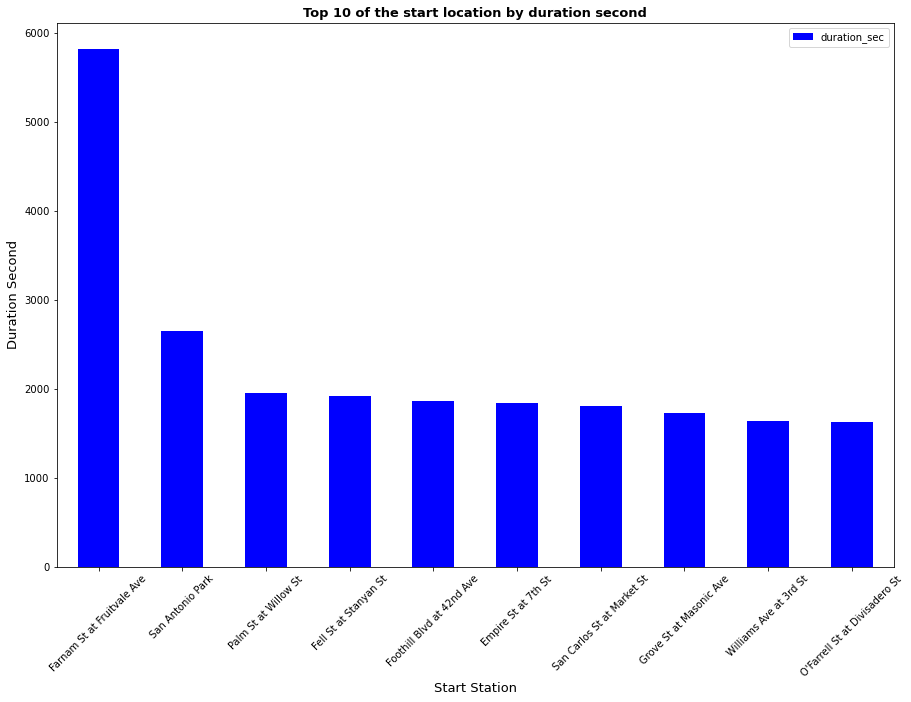

In [14]:
color = ['blue']
top10start = dataset.groupby(['start_station_name'], as_index = False).mean().sort_values(by=['duration_sec'],ascending=False).head(10)
top10start.plot(kind='bar',x='start_station_name' ,y='duration_sec', figsize=(15, 10), rot=45, color=color)
plt.title("Top 10 of the start location by duration second", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Start Station", color = 'black', fontsize = '13')
plt.ylabel("Duration Second", color = 'black', fontsize = '13')

The Farnam St at Fruitvale Ave is in the first place and the average are quite same.

### What are the distribution of Farnam St at Fruitvale Ave and San Antonio Park?

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Frequency')

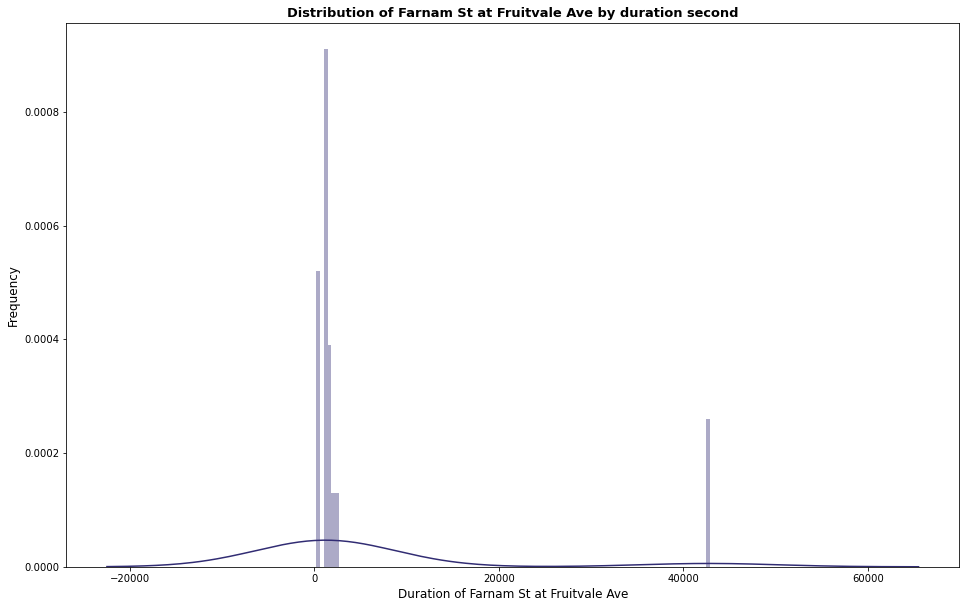

In [15]:
farnam= dataset[(dataset['start_station_name']=='Farnam St at Fruitvale Ave')]
plt.figure(figsize=(16,10))
sns.distplot(farnam['duration_sec'], bins=100, color='#312c73')
plt.title("Distribution of Farnam St at Fruitvale Ave by duration second", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Duration of Farnam St at Fruitvale Ave", color = 'black', fontsize = '12')
plt.ylabel("Frequency", color = 'black', fontsize = '12')

The distribution of Farnam St is almost in 0 value with the highest approximately 0.0001

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Frequency')

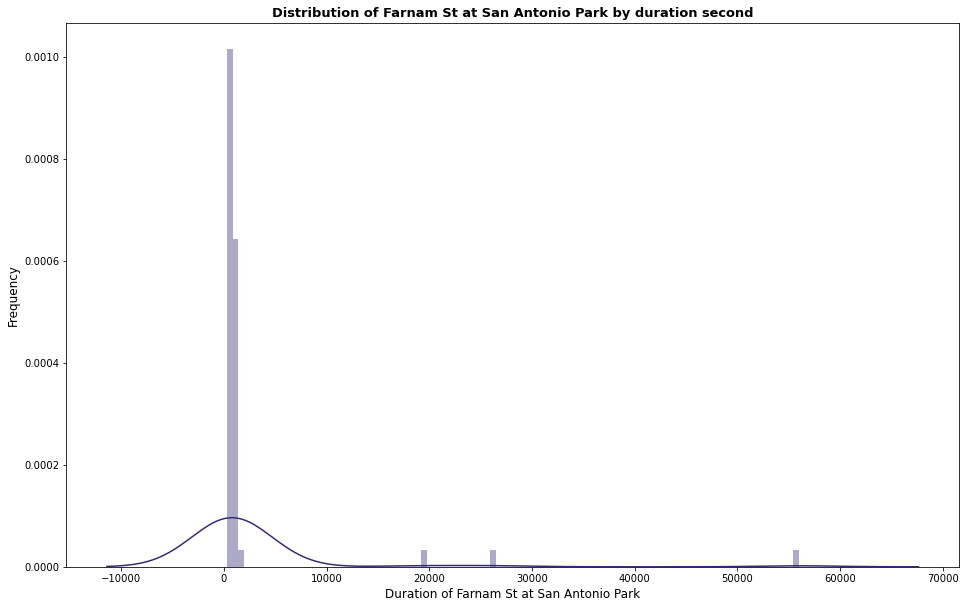

In [16]:
antonio= dataset[(dataset['start_station_name']=='San Antonio Park')]
plt.figure(figsize=(16,10))
sns.distplot(antonio['duration_sec'], bins=100, color='#312c73')
plt.title("Distribution of Farnam St at San Antonio Park by duration second", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Duration of Farnam St at San Antonio Park", color = 'black', fontsize = '12')
plt.ylabel("Frequency", color = 'black', fontsize = '12')

The distribution of San Antonio is almost in 0 value with the highest approximately 0.0010

### What are the distributions in gender in this dataset? 

In [17]:
gender_distribute = dataset.groupby(['member_gender'])['member_gender'] \
                           .count() \
                           .reset_index(name='count') \
                           .sort_values(['count'], ascending=False)
gender_distribute.head()

,member_gender,count
1,Male,130651
0,Female,40844
2,Other,3652


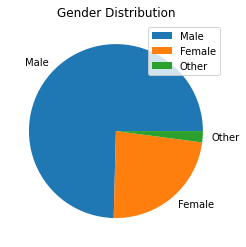

In [18]:
plt.pie(gender_distribute['count'], labels=gender_distribute['member_gender'])
plt.legend()
plt.title("Gender Distribution")
plt.show()

> The majority of member register for the service is Male

### Distribution of user type

In [19]:
utype_distribute = dataset.groupby(['user_type'])['user_type'] \
                           .count() \
                           .reset_index(name='count') \
                           .sort_values(['count'], ascending=False)
utype_distribute.head()

,user_type,count
1,Subscriber,163544
0,Customer,19868


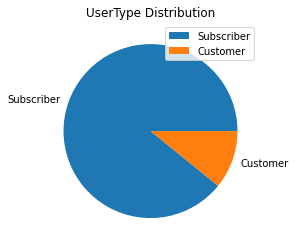

In [20]:
plt.pie(utype_distribute['count'], labels=utype_distribute['user_type'])
plt.legend()
plt.title("UserType Distribution")
plt.show()

> Most of the data in this dataset is from Subscribers

### The variety of member age

In [21]:
import datetime

year = dataset['start_time'].dt.year

age_variety = pd.DataFrame(dataset.filter(items=['member_birth_year', 'duration_sec']))
age_variety.dropna(inplace=True)

age_variety['member_age'] = year - dataset['member_birth_year']
age_variety.head()

,member_birth_year,duration_sec,member_age
0,1984.0,52185,35.0
2,1972.0,61854,47.0
3,1989.0,36490,30.0
4,1974.0,1585,45.0
5,1959.0,1793,60.0


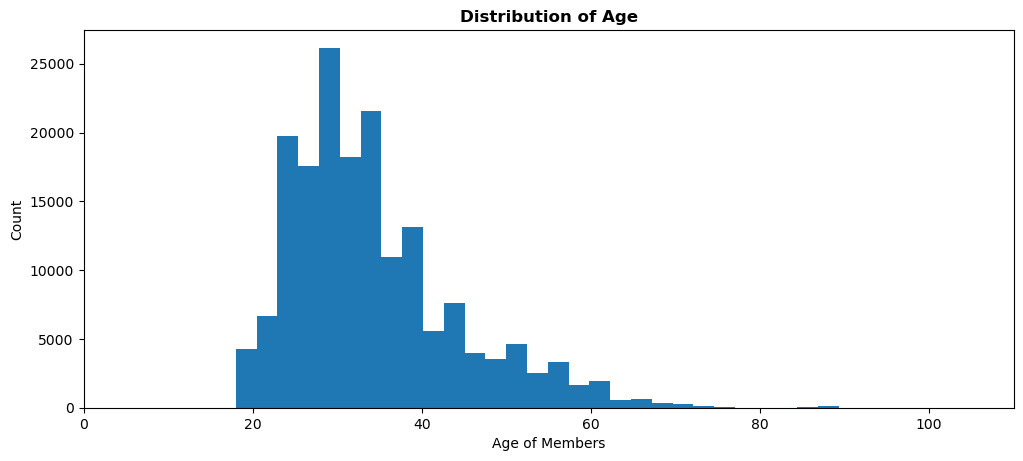

In [22]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 100)
plt.hist(x=age_variety['member_age'], bins=50)
plt.xlim(0,110)
plt.title("Distribution of Age", fontweight='bold')
plt.xlabel("Age of Members")
plt.ylabel("Count")
plt.show()

> We can see that the distribution of the member's age is skewed on the average of 30s.

### The distribution of duration (by second)

In [23]:
duration_distribute = dataset.groupby(['duration_sec'])['duration_sec'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
duration_distribute.head()

,duration_sec,count
211,272,311
263,324,292
245,306,291
262,323,291
244,305,290


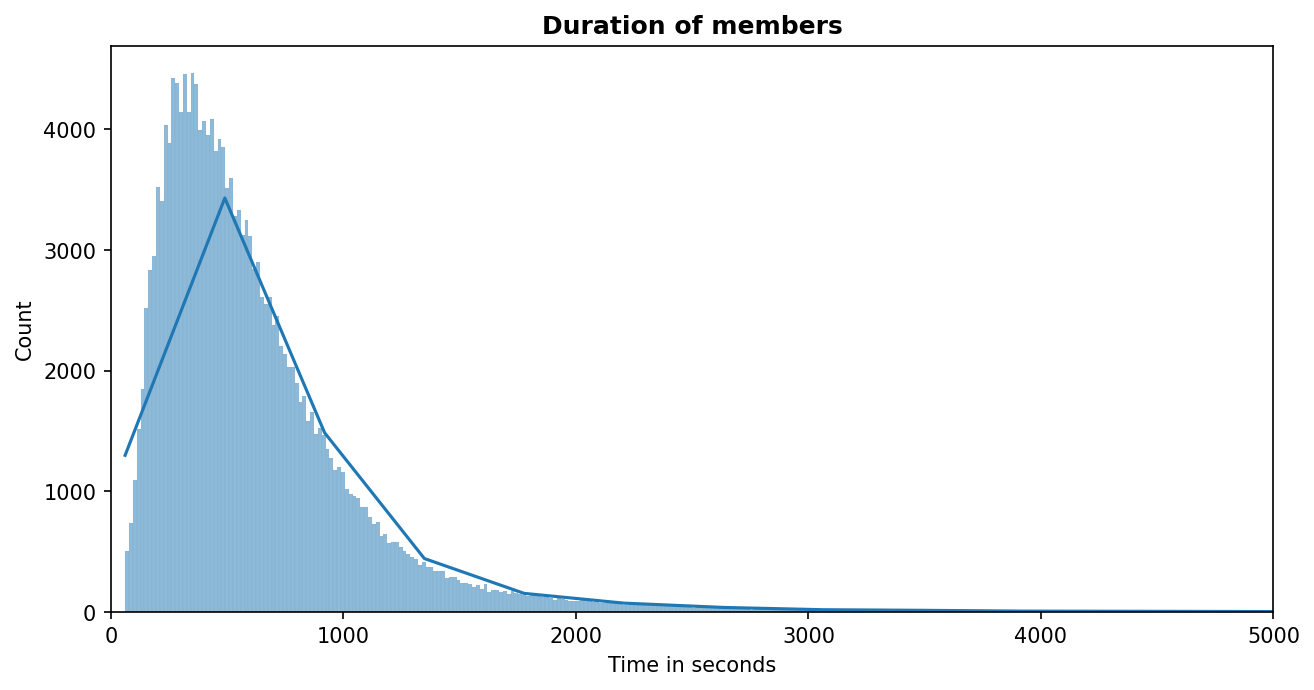

In [24]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 150);
sns.histplot(data=dataset, x=dataset['duration_sec'], kde = True);
plt.xlim(0,5000);
plt.title("Duration of members", fontweight='bold');
plt.xlabel("Time in seconds");
plt.ylabel("Count")
plt.show()

> We could see that the majority of users would travel about 400 to 1000 seconds per route.

### Distribution of duration by age

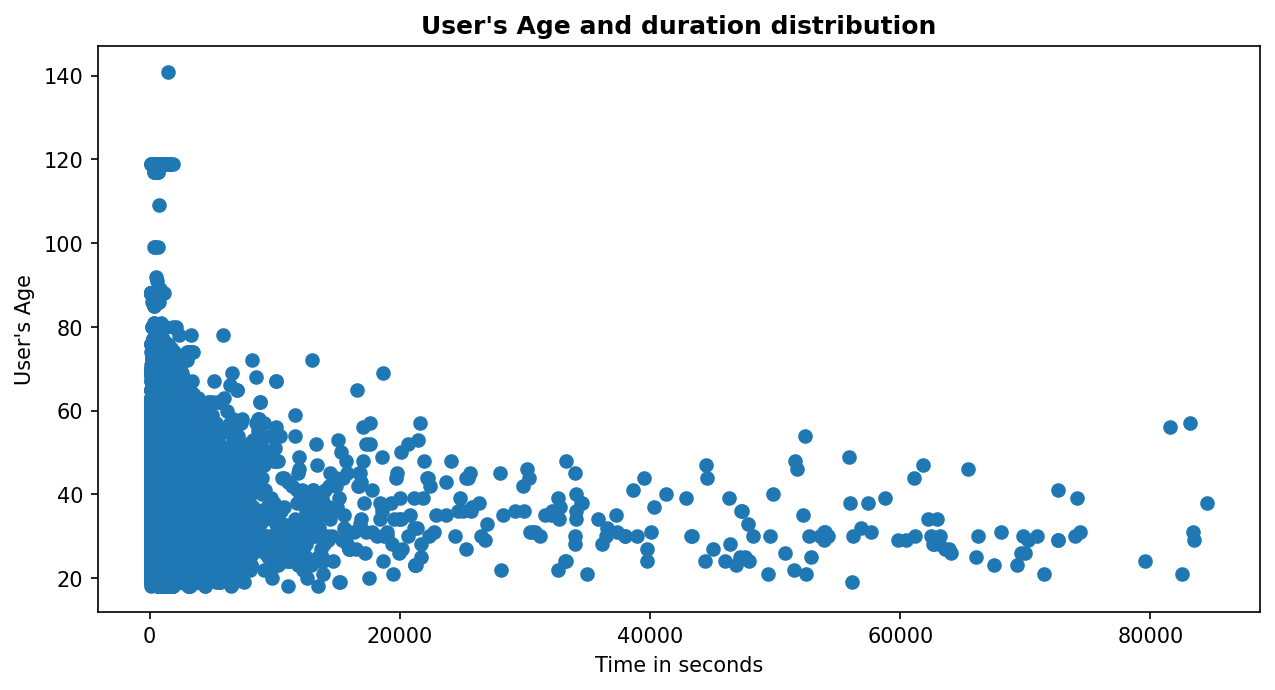

In [25]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 150);
plt.scatter(x=age_variety['duration_sec'], y=age_variety['member_age']);
plt.title("User's Age and duration distribution", fontweight='bold');
plt.xlabel("Time in seconds")
plt.ylabel("User's Age")
plt.show()

> Through the scatterplot we could see there are some outliers in age (for example ages above 100). Most of the users would ride no more than 40,000 sec per ride.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After analyzing the data, we can see that the data is skewed, not equally distributed. The majority of data is from the age of 30s.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I would consider to remove some of the data in the range of 60 to above to have the data distributed equally.

## Bivariate Explorations

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### The correlation between duration second and Gender

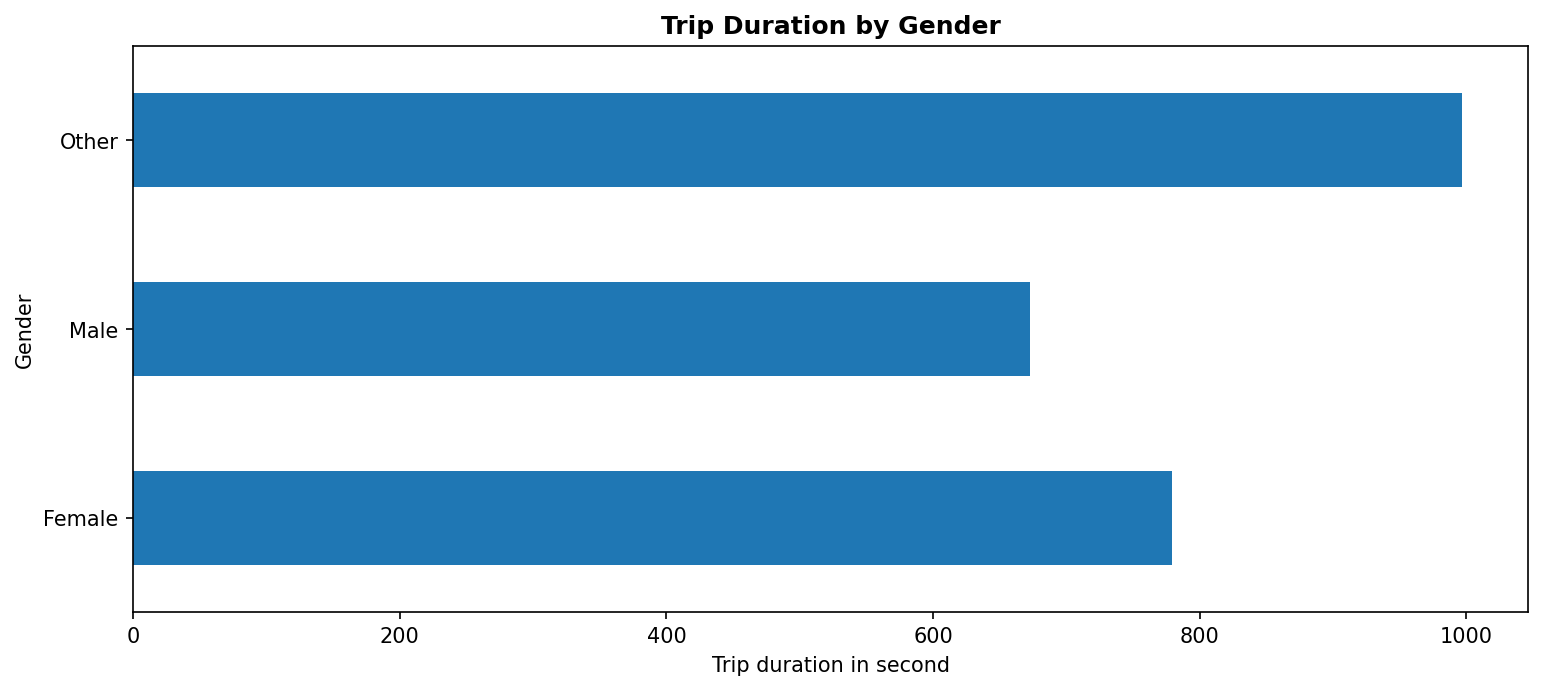

In [26]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
biplot = dataset.groupby('member_gender')['duration_sec'].mean().plot(kind='barh');
biplot.set_title('Trip Duration by Gender', fontweight='bold');
biplot.set_ylabel('Gender');
biplot.set_xlabel('Trip duration in second');
plt.xticks(rotation=0);

> It seems that people would prefer to go out on weekends rather than during the week.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Although male remained highest in the dataset, women spend more time riding than men.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> After my investigation, people would prefer spending time riding more on the weekends.

## Multivariate Exploration

### Check whether there is some relevant between duration, weekday and gender

In [27]:
x = dataset['start_time'].dt.day_name()
y = 'duration_sec'
weekday = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

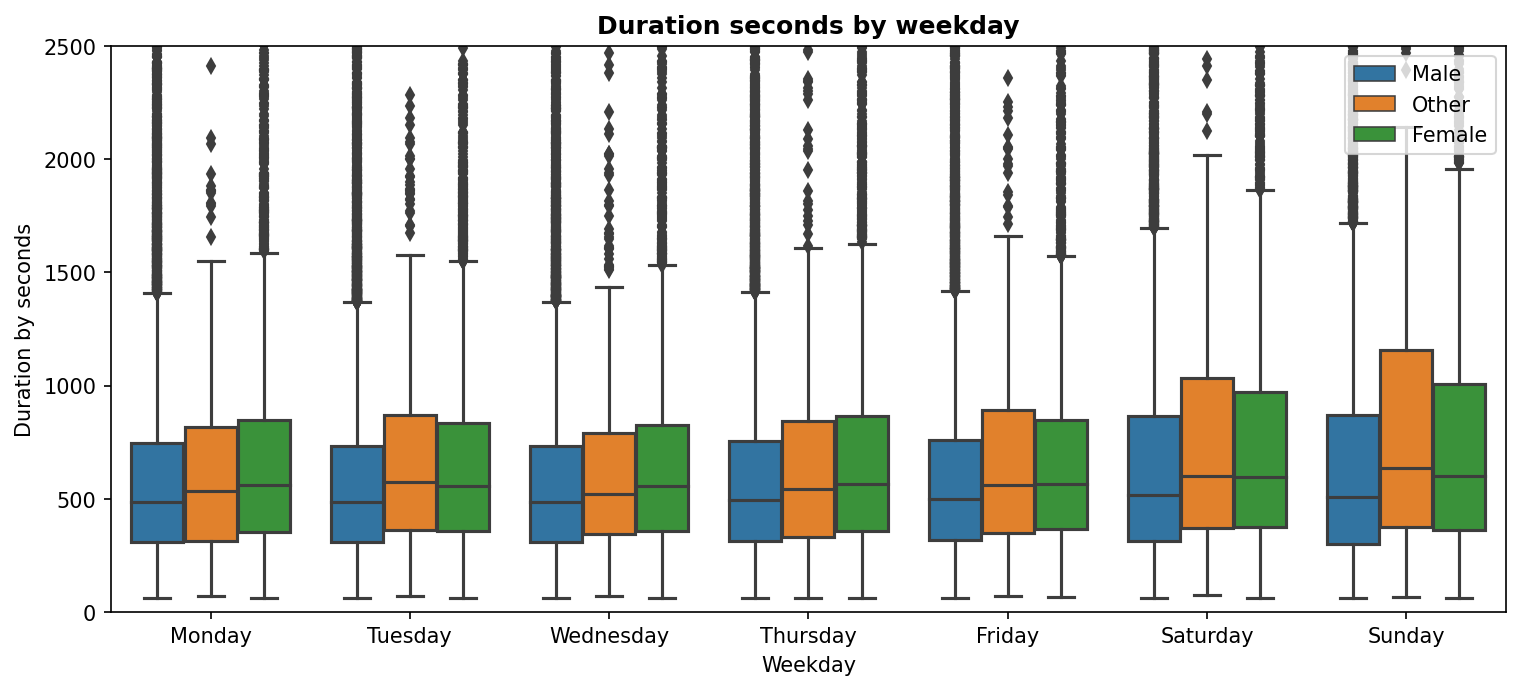

In [28]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
sns.boxplot(data=dataset, x=x, y=y, order=weekday, hue="member_gender")
plt.ylim([0,2500])
plt.title("Duration seconds by weekday", fontweight='bold')
plt.xlabel("Weekday")
plt.ylabel("Duration by seconds")
plt.legend(loc=1)

> Most of the people would like to ride on weekends, and least on Wednesday (cause it is in the middle of the week).

### Correlation between location(latitude and longitude) and duration by sec

In [ ]:
!pip install gmaps --q

In [26]:
!jupyter nbextension enable --py gmaps
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [29]:
import gmaps
import gmaps.datasets

location = dataset[['start_station_latitude', 'start_station_longitude']]
weight = dataset['duration_sec']

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(location, weights=weight))
fig

Figure(layout=FigureLayout(height='420px'))

#### Could you help me to run this one in jupyter notebook local. This image blow is the results

![alt text](map1.png)

 ![](../map1.png)

> There are more users living in San Francisco and less in Oakland and Berkeley. The reason why people concentrated in San Francisco because is it's a travelling city so it have a lot of travelers visited and they rent the bike to go around the city and the beach easier.

In [30]:
location = dataset[['end_station_latitude', 'end_station_longitude']]
weight = dataset['duration_sec']

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(location, weights=weight))
fig

Figure(layout=FigureLayout(height='420px'))

#### Could you help me to run this one in jupyter notebook local. This image blow is the results

![image.png](map2.png)

> There are more users living in San Francisco and less in Oakland and Berkeley. The reason why people concentrated in San Francisco because is it's a travelling city so it have a lot of travelers visited and they rent the bike to go around the city and the beach easier.

### Correlation between user type, duration by sec and gender

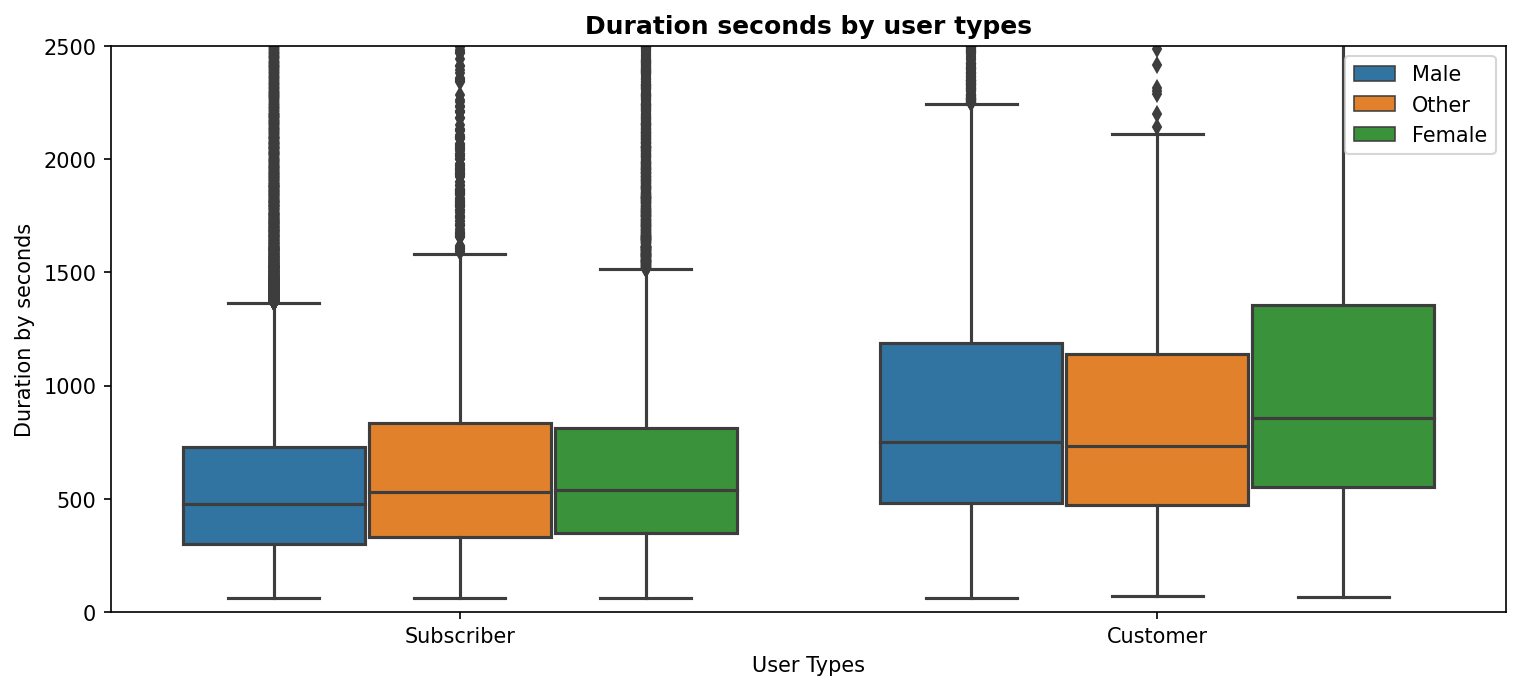

In [31]:
x = dataset['user_type']
y = 'duration_sec'

utype_order = ['Subscriber', 'Customer']

fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
sns.boxplot(data=dataset, x=x, y=y, order=utype_order, hue="member_gender")
plt.ylim([0,2500])
plt.title("Duration seconds by user types", fontweight='bold')
plt.xlabel("User Types")
plt.ylabel("Duration by seconds")
plt.legend(loc=1)
plt.show()

> Female customer would ride least, but female subscribers ride most and with a variety of duration lengths.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The users have to change by duration time and region. Male register bikes the most, but time using is still less than Female. Besides, most of the users are living in North-East of San Francisco.

### Were there any interesting or surprising interactions between features?

> In my opinion, I recommend that the bike stores should located in the North-East of San Francisco because this region have more needs than others.

## Conclusions

> In conclusion, Male have a huge ratio, but Female spend more time on riding than another. As a result, we need to have a strategy to attract them using our service more. Besides, almost users usually ride bicycle on weekend. If we could setup some kind of outdoor show to marketing our service.
